In [2]:
import skfuzzy as skf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class membershipGroup:
    def __init__(self):
        self.captured_member = []
        self.member = []

    def add_member(self,membername : str, domain_space, point : list ):

        if len(point) == 4:
            new_member = {}
            new_member[membername] = skf.trapmf(domain_space,point)
            self.member.append(new_member)
        elif len(point) == 3:
            new_member = dict(membername = skf.trimf(domain_space,point))
            self.member.append(new_member)


    def interp(self,value : int, domain_space):
        for variable in self.member:
            key = list(variable)
            checker = skf.interp_membership(domain_space,variable.get(key[0]),value)


            if checker > 0.00:
                self.captured_member.append(variable)
                print(key[0],':',checker)

    def show_plot(self,domian_space):
        for variable in self.member:
            key = list(variable)
            plt.plot(domian_space,variable.get(key[0]),linewidth=1.5)
            plt.fill_between(domian_space,variable.get(key[0]),alpha=0.2)
        plt.show()

    def show_capture_member(self):
        tmp = []
        for variable in self.captured_member:
            keys = list(variable)
            tmp.append(keys[0])

        print(tmp)





T2 : 0.5
T3 : 0.5


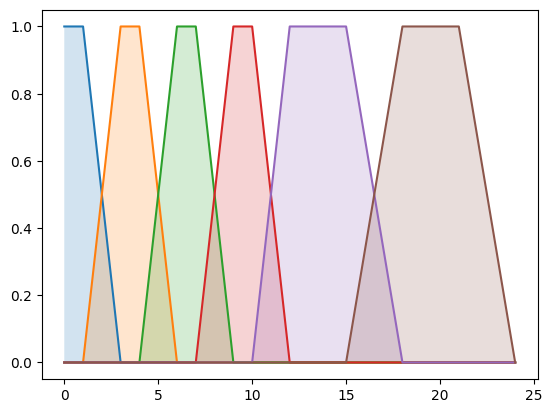

['T2', 'T3']


In [4]:
domainU = np.arange(0.,24.1,0.1)
AgeMembership = membershipGroup()

AgeMembership.add_member('T1',domainU,[0.,0.,1.,3.])
AgeMembership.add_member('T2',domainU,[1.,3.,4.,6.])
AgeMembership.add_member('T3',domainU,[4.,6.,7.,9.])
AgeMembership.add_member('T4',domainU,[7.,9.,10.,12.])
AgeMembership.add_member('T5',domainU,[10.,12.,15.,18.])
AgeMembership.add_member('T6',domainU,[15.,18.,21.,24.])
AgeMembership.interp(5.,domainU)

AgeMembership.show_plot(domainU)

AgeMembership.show_capture_member()



SS : 0.09090909090909091
S : 0.9090909090909091


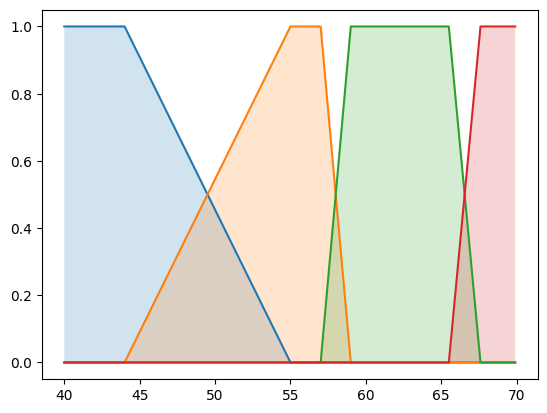

['SS', 'S']


In [8]:
domainT = np.arange(40.,70.,0.1)
HeightMembership = membershipGroup()

HeightMembership.add_member('SS',domainT,[0.,0.,44.,55.])
HeightMembership.add_member('S',domainT,[44.,55.,57.,59.])
HeightMembership.add_member('NH',domainT,[57.,59.,65.5,67.6])
HeightMembership.add_member('H',domainT,[65.5,67.6,100,100])
HeightMembership.interp(54.,domainT)

HeightMembership.show_plot(domainT)

HeightMembership.show_capture_member()

SU : 0.6086956521739131
U : 0.39130434782608686


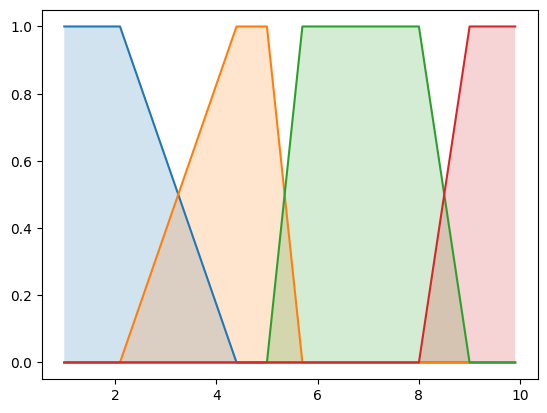

['SU', 'U']


In [9]:
domainB = np.arange(1.,10.,0.1)
WeightMembership = membershipGroup()

WeightMembership.add_member('SU',domainB,[0.,0.,2.1,4.4])
WeightMembership.add_member('U',domainB,[2.1,4.4,5.,5.7])
WeightMembership.add_member('I',domainB,[5.,5.7,8.,9.])
WeightMembership.add_member('PO',domainB,[8.,9.,10,10])

WeightMembership.interp(3.,domainB)

WeightMembership.show_plot(domainB)

WeightMembership.show_capture_member()

PRO : 1.0


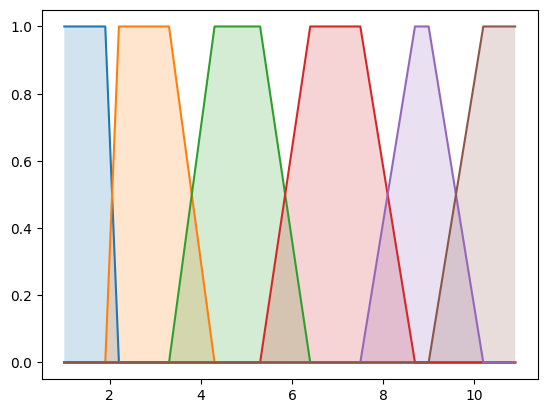

['PRO']


In [10]:
domainO = np.arange(1,11.,0.1)
OutputMembership = membershipGroup()

OutputMembership.add_member('SW',domainO,[1.,1.,1.9,2.2])
OutputMembership.add_member('W',domainO,[1.9,2.2,3.3,4.3])
OutputMembership.add_member('N',domainO,[3.3,4.3,5.3,6.4])
OutputMembership.add_member('PRO',domainO,[5.3,6.4,7.5,8.7])
OutputMembership.add_member('OV',domainO,[7.5,8.7,9.,10.2])
OutputMembership.add_member('OB',domainO,[9.,10.2,11.,11.])

OutputMembership.interp(7.,domainO)

OutputMembership.show_plot(domainO)

OutputMembership.show_capture_member()

In [26]:
class mamdaniSolver:
    def __init__(self):
        self.membershipGroupList = []
        self.rules = []
        self.captured_output = []

    def add_rules(self,v1 : list,v2 : str):
        rule = {}
        rule[v2] = v1
        self.rules.append(rule)

    def capture_output_member(self,x : list, y : list, z : list):
        ordering = []
        order1 = []
        order2 = []

        if len(x) == 2:
            order1.append(x[0])
            order2.append(x[1])
        else:
            order1.append(x[0])
            order2.append(x[0])

        if len(x) == 2:
            order1.append(y[0])
            order2.append(y[1])
        else:
            order1.append(y[0])
            order2.append(y[0])

        if len(x) == 2:
            order1.append(z[0])
            order2.append(z[1])
        else:
            order1.append(z[0])
            order2.append(z[0])

        ordering.append(order1)
        ordering.append(order2)

        for rule in self.rules:
            key = list(rule)
            check = list(rule.values())
            for seq in ordering:
                if seq == check[0]:
                    self.captured_output.append(key[0])





In [30]:
AbsoluteSolver = mamdaniSolver()

Umur = ['T1','T2','T3','T4','T5','T6']
Tinggi = ['SS','S','NH','H']
Berat = ['SU','U','I','PRO']
OutPut = ['SW','SW','W','W','SW','W','G','G','W','G','G','G','OB','OV','PRO','G']
counter = 0

for i in Umur:
    for j in Berat:
        for k in Tinggi:
            tmp = [i,j,k]
            AbsoluteSolver.add_rules(tmp,OutPut[counter])
            counter += 1
            if counter == 16:
                counter = 0

AbsoluteSolver.capture_output_member(['T1'],['SU','U'],['SS','S'])
print(AbsoluteSolver.captured_output)

['SW', 'SW']
